In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import rand_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs

In [18]:
x=load_iris()['data']
y=load_iris()['target']

In [19]:
model=AgglomerativeClustering()
model.fit(x)
y_pred=model.labels_

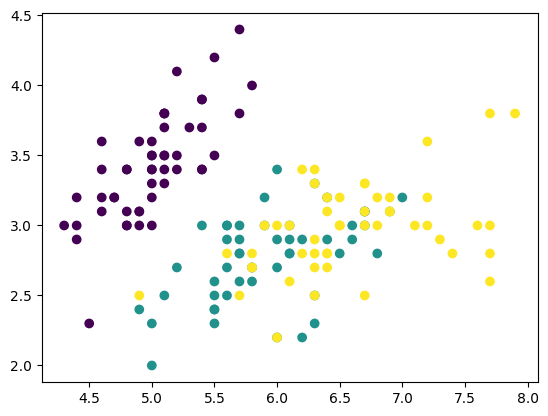

In [20]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [21]:
clusters=linkage(x, method='ward')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

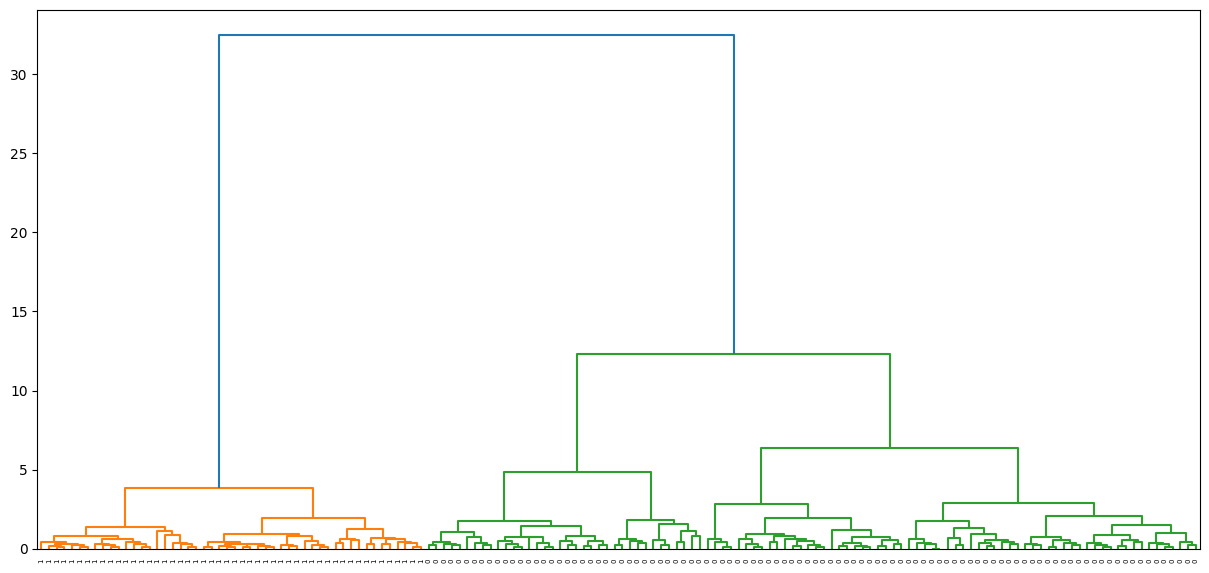

In [22]:
f=plt.figure(figsize=(15,7))
dendrogram(clusters, labels=y_pred)

<Axes: >

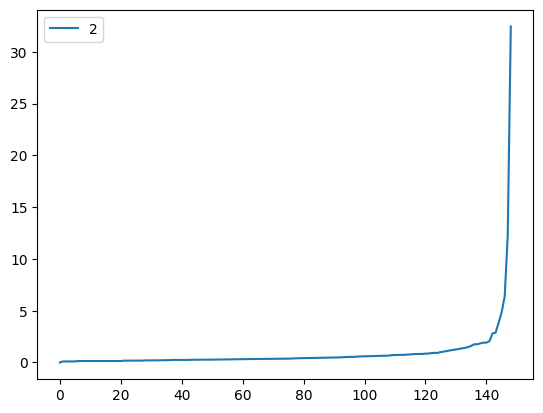

In [23]:
pd.DataFrame(clusters).plot(y=2)

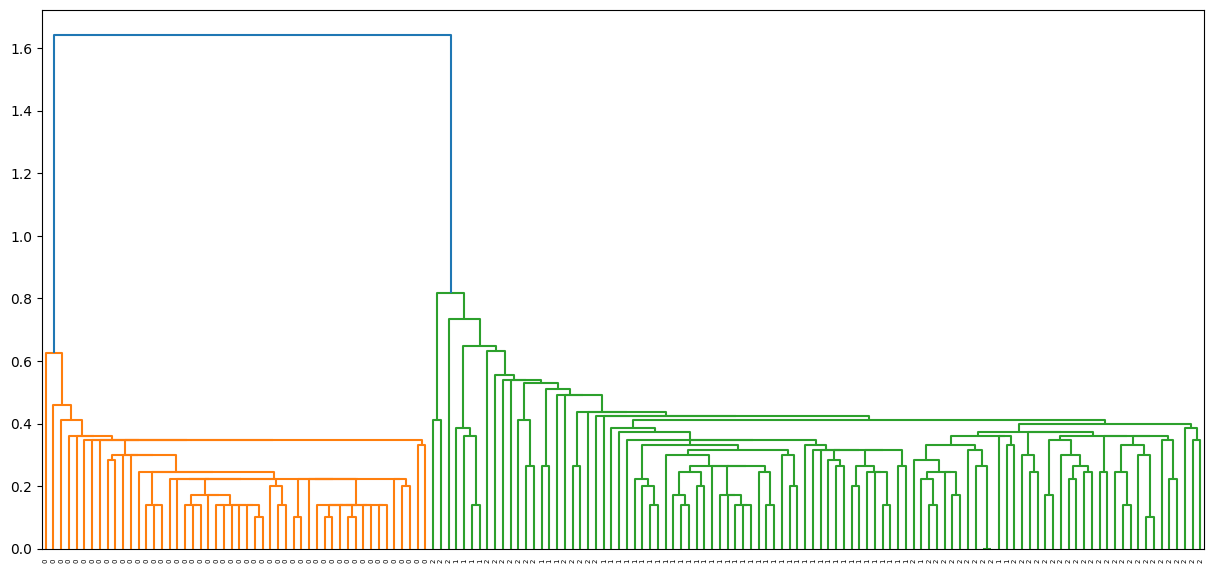

In [24]:
clusters=linkage(x,method='single',)
f=plt.figure(figsize=(15,7));
dendrogram(clusters, labels=y);

In [35]:
model=AgglomerativeClustering(n_clusters=3, linkage='average', compute_distances=True)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [152.5, 152.5, 191.25, 191.25],
  [130.0, 130.0, 171.875, 171.875],
  [115.0, 115.0, 150.9375, 150.9375],
  [92.5, 92.5, 132.96875, 132.96875],
  [62.5, 62.5, 112.734375, 112.734375],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [255.0, 255.0, 281.25, 281.25],
  [240.0, 240.0, 268.125, 268.125],
  [225.0, 225.0, 254.0625, 254.0625],
  [87.6171875, 87.6171875, 239.53125, 239.53125],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0]

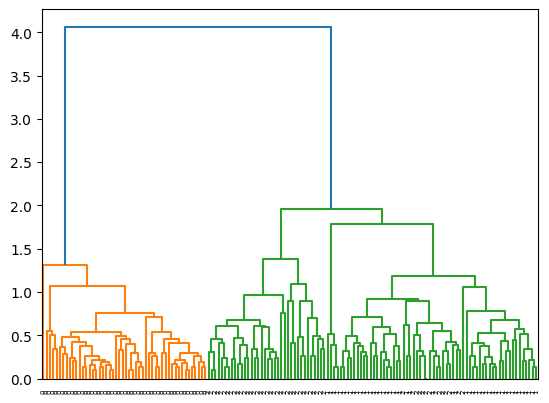

In [36]:
model.fit(x)
cnts=np.zeros(model.children_.shape[0])
num=x.shape[0]
for i,m in enumerate(model.children_):
  cnt=0
  for ind in m:
    if ind<num:
      cnt+=1
    else:
      cnt+=cnts[ind-num]
    cnts[i]=cnt
lnkg=np.column_stack([model.children_, model.distances_, cnts])
dendrogram(lnkg, labels=y)

In [37]:
rand_score(y, model.labels_)

0.8922595078299776

In [39]:
rand=[]
model=AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)
model.fit(x)
rand+=[rand_score(y, model.labels_)]
model=AgglomerativeClustering(n_clusters=3, linkage='complete', compute_distances=True)
model.fit(x)
rand+=[rand_score(y, model.labels_)]
model=AgglomerativeClustering(n_clusters=3, linkage='average', compute_distances=True)
model.fit(x)
rand+=[rand_score(y, model.labels_)]
model=AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True)
model.fit(x)
rand+=[rand_score(y, model.labels_)]
rand

[0.7766442953020134,
 0.8367785234899329,
 0.8922595078299776,
 0.8797315436241611]

In [43]:
abs(np.array([dict({1:0, 0:1, 2:2})[x] for x in model.labels_])-y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

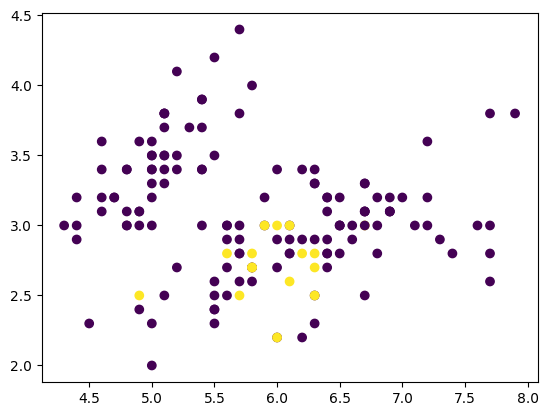

In [44]:
plt.scatter(x[:,0], x[:,1], c=abs(np.array([dict({1:0, 0:1, 2:2})[x] for x in model.labels_])-y))

### Lab

<Axes: xlabel='f1', ylabel='f2'>

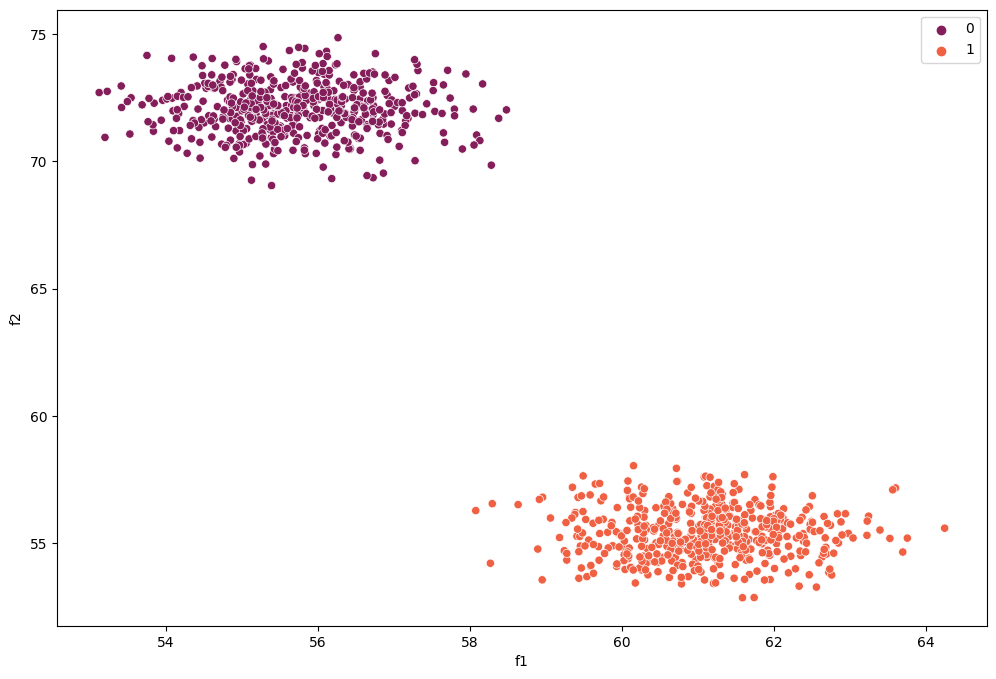

In [11]:
x,y,centers = make_blobs(n_samples = 1000, centers = 2, n_features = 2, center_box=[2,100], return_centers = True, random_state = 0)
x=pd.DataFrame(x, columns=['f1','f2'])
plt.figure(figsize=(12,8))
sns.scatterplot(data=x, x="f1",y="f2", hue=y, palette="rocket")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [55.0, 55.0, 74.375, 74.375],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [172.5, 172.5, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [295.0, 295.0, 305.0, 305.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [415.0, 415.0, 425.0, 425.0],
  [445.0, 445.0, 455.0, 455.0],
  [435.0, 435.0, 450.0, 450.0],
  [495.0, 495.0, 505.0, 505.0],
  [525.0, 525.0, 535.0, 535.0],
  [565.0, 565.0, 575.0, 575.0],
  [595.0, 595.0, 605.0, 605.0],
  [625.0, 625.0, 635.0, 635.0],
  [615.0, 615.0, 630.0, 630.0],
  [600.0, 600.0, 622.5, 622.5],
  [655.0, 655.0, 665.0, 665.0],
  [645.0, 645.0, 660.0, 660.0],
  [611.25, 6

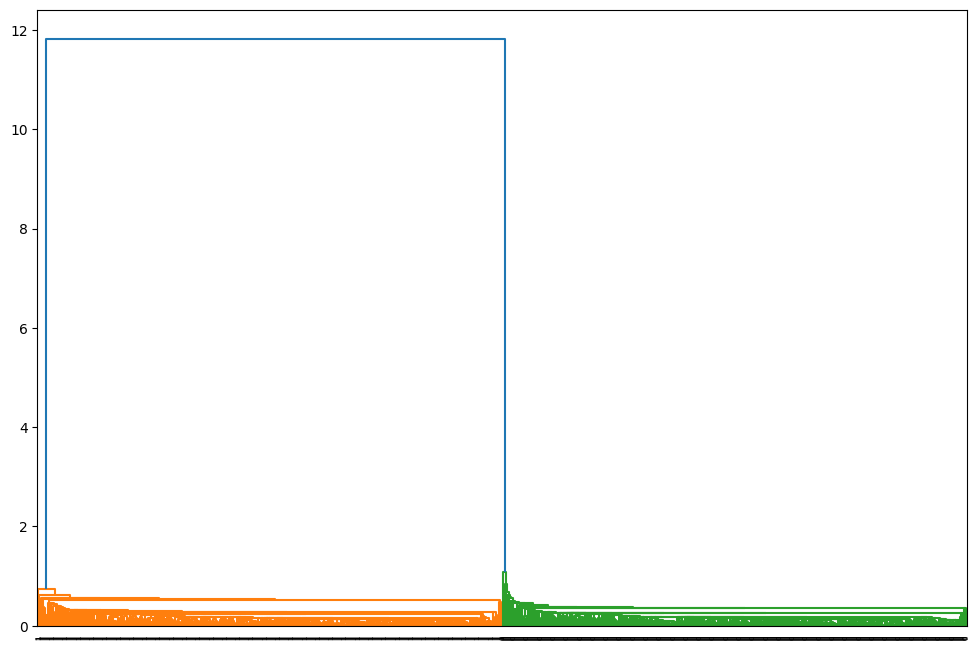

In [12]:
model=AgglomerativeClustering()
model.fit(x)
y_pred=model.labels_

clusters=linkage(x, method='single')

f=plt.figure(figsize=(12, 8))
dendrogram(clusters, labels=y_pred)

In [14]:
model=AgglomerativeClustering(n_clusters=2, linkage='average')
model.fit(x)
model.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

In [29]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
df=pd.read_excel('/content/default of credit card clients.xls', header=1)
x=df.iloc[:,5:11]
y=df.iloc[:,-1].values
X=df.iloc[:,1:-1]

--2023-08-16 11:29:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls.6’

default of credit c     [     <=>            ]   5.28M  4.52MB/s    in 1.2s    

2023-08-16 11:29:33 (4.52 MB/s) - ‘default of credit card clients.xls.6’ saved [5539328]



In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)

In [ ]:
clusters=linkage(xsc, method='average')

f=plt.figure(figsize=(15, 8))
dendrogram(clusters, labels=y)

In [ ]:
clusters=linkage(x, method='ward')

f=plt.figure(figsize=(15, 8))
dendrogram(clusters)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [14.375, 14.375, 60.0, 60.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [145.0, 145.0, 167.5, 167.5],
  [135.0, 135.0, 156.25, 156.25],
  [103.75, 103.75, 145.625, 145.625],
  [85.0, 85.0, 124.6875, 124.6875],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [265.0, 265.0, 284.375, 284.375],
  [250.0, 250.0, 274.6875, 274.6875],
  [230.0, 230.0, 262.34375, 262.34375],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [465.0, 465.0, 475

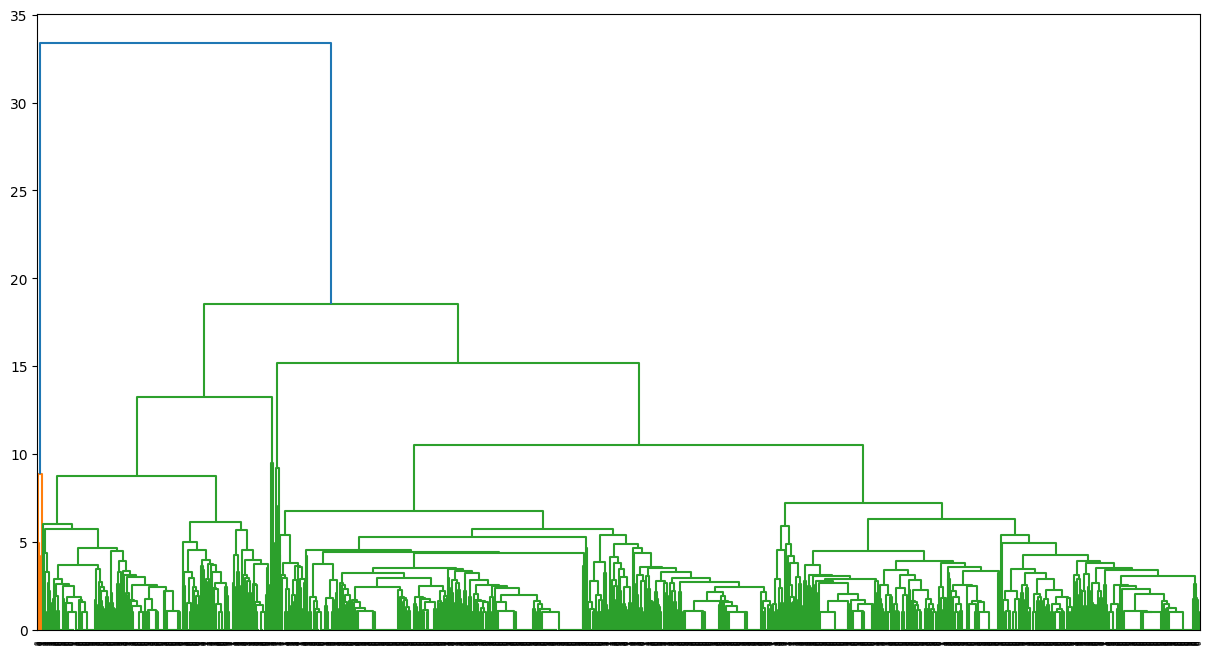

In [27]:
model=AgglomerativeClustering(n_clusters=3, linkage='average', compute_distances=True)
model.fit(x)
cnts = np.zeros(model.children_.shape[0])
num=xsc.shape[0]
for i,m in enumerate(model.children_):
  cnt=0
  for ind in m:
    if ind<num:
      cnt+=1
    else:
      cnt+=cnts[ind-num]
    cnts[i]=cnt
lnkg=np.column_stack([model.children_, model.distances_, cnts])
f=plt.figure(figsize=(15, 8))
dendrogram(lnkg, labels=y)

In [36]:
model=AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True)
model.fit(x)
X['clasters']=model.labels_

<ipython-input-36-b765934c613a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clasters']=model.labels_


In [40]:
X.groupby('clasters').agg({"LIMIT_BAL":["mean" ]})

,LIMIT_BAL
,mean
clasters,
0,172347.652710
1,139881.395349
2,195909.322283
